In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import plotly.io as pio
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
# Set notebook mode to work in offline
pyo.init_notebook_mode()
pd.set_option("display.precision", 1)
pd.options.display.max_rows = 999
# import random
# import string
# from random import randint

# Plotly Visualizations 
- Quick Examples
- Product Usage Data Analysis


## Quick Examples

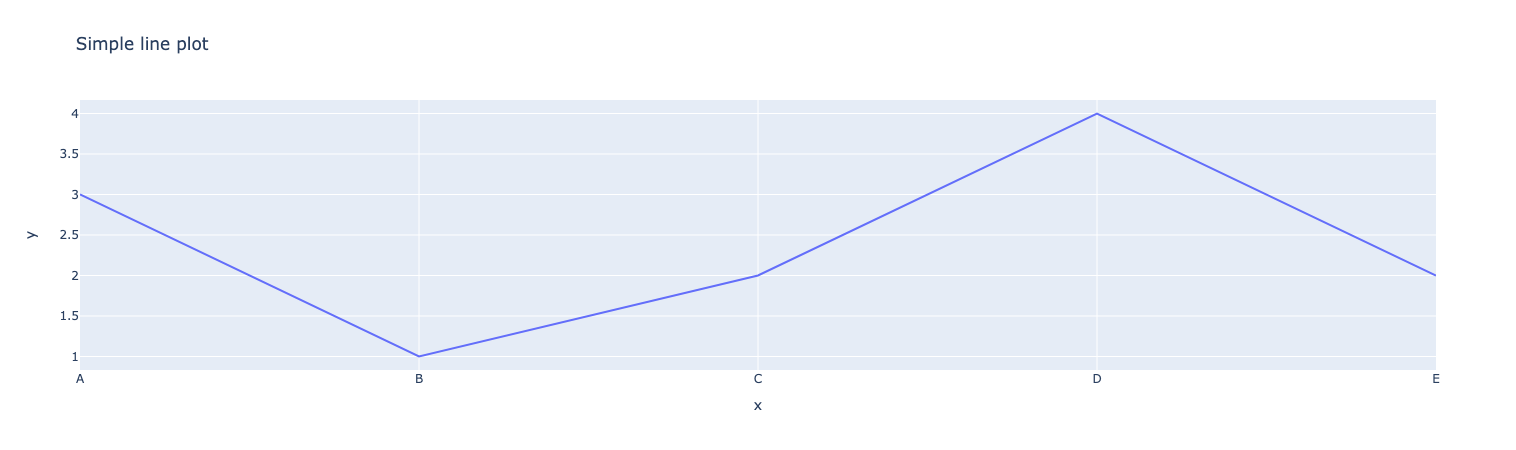

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['A', 'B', 'C', 'D', 'E'], dtype=object),
              'xaxis': 'x',
              'y': array([3, 1, 2, 4, 2]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Simple line plot'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


In [2]:
# Simple example line chart
fig = px.line(x= ['A', 'B', 'C', 'D','E'], y = [3,1,2,4,2],title='Simple line plot')
fig.show()
print(fig)


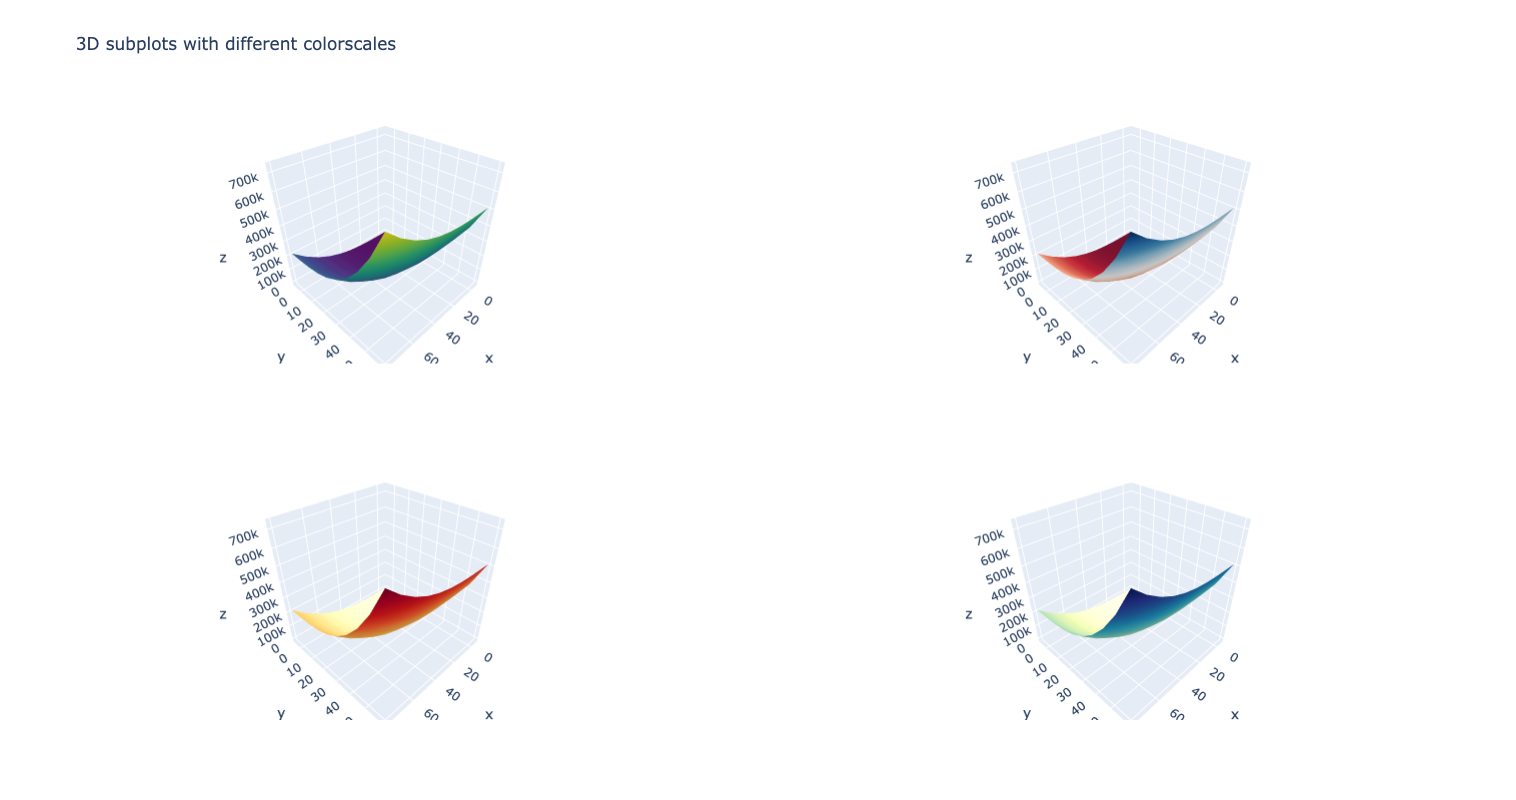

In [3]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]])

# Generate data
x = np.linspace(-5, 80, 10)
y = np.linspace(-5, 60, 10)
xGrid, yGrid = np.meshgrid(y, x)
z = xGrid ** 3 + yGrid ** 3

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='RdBu', showscale=False),
    row=1, col=2)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlOrRd', showscale=False),
    row=2, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlGnBu', showscale=False),
    row=2, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

# fig.show()
# print(fig)

# Product Usage Data Analysis

Load Data

In [4]:
df = pd.read_csv('product_usage_sample.csv', index_col=0)

In [5]:
df.sample(10)

company-id        date      service-area product-id  cpu-limit  cpu-used
40   Company 43  2022-01-03    Service Area I         P2       21.0       9.0
286  Company 29  2022-01-14  Service Area III        P16        0.0       0.0
253  Company 33  2022-01-18    Service Area I         P3        7.0       5.0
8    Company 10  2022-01-17    Service Area I         P2        4.0       1.0
267  Company 14  2022-01-21  Service Area III        P18       69.0       6.0
157  Company 36  2022-01-26   Service Area IV        P24       32.0      36.0
275  Company 44  2022-01-21  Service Area III        P18        0.0       0.0
256  Company 38  2022-01-31    Service Area I         P3        7.0       6.0
132  Company 34  2022-01-25  Service Area III        P19        5.0       6.0
269  Company 20  2022-01-10  Service Area III        P18        5.0       6.0

## Bar Chart and Horizontal Bar Chart

In [6]:
df_count = df.groupby(['service-area']).nunique()[['company-id']].reset_index().rename(columns={'company-id':'company-count'})
df_count.head()

service-area  company-count
0    Service Area I             43
1   Service Area II             29
2  Service Area III             34
3   Service Area IV             21
4    Service Area V              6

## Stacked bar Chart

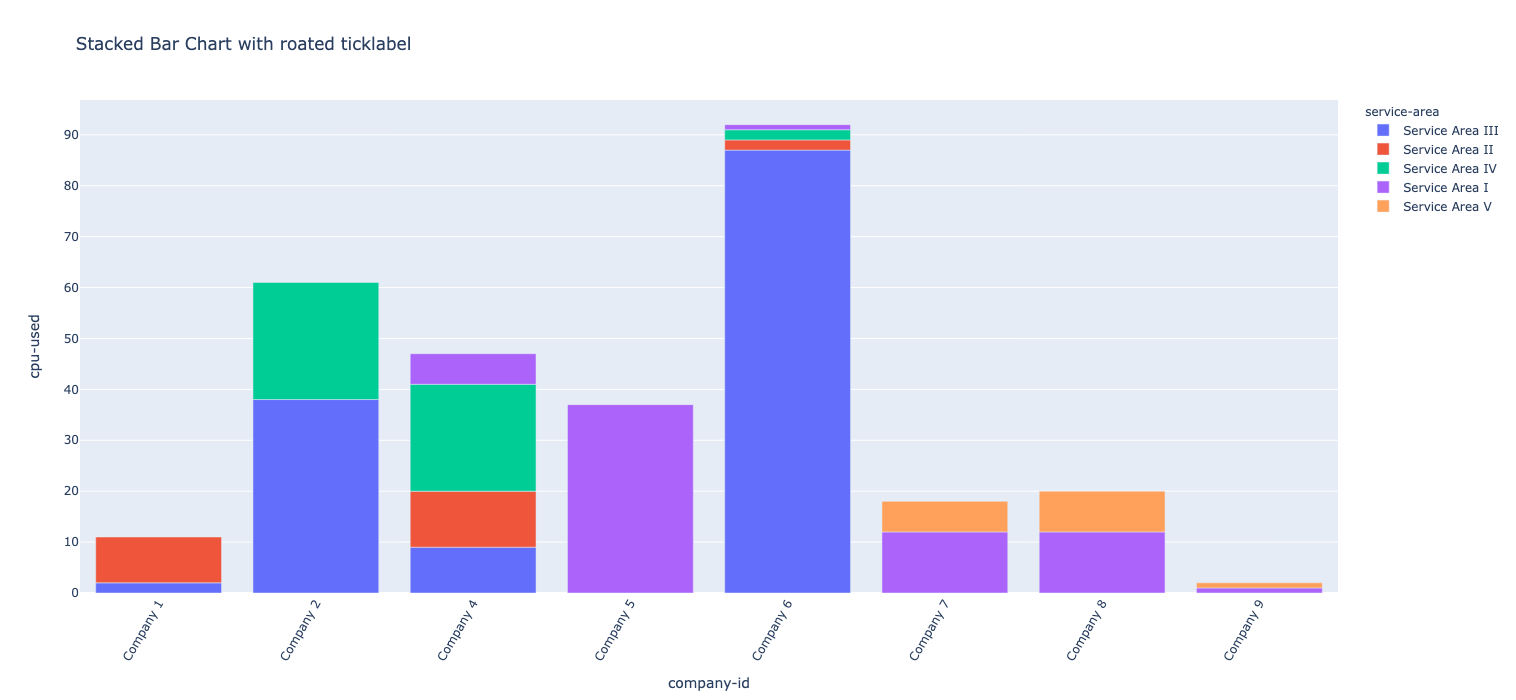

In [7]:
df_stacked = df[df['company-id'].isin(['Company '+str(i) for i in range(1,10)])].groupby(['service-area','company-id']).sum()[['cpu-used']].reset_index().sort_values(by='company-id')
fig = px.bar(df_stacked,x='company-id',y='cpu-used', color='service-area',title = 'Stacked Bar Chart with roated ticklabel', width=1000, height=700)
fig.update_xaxes(tickangle=-60)
fig.show()

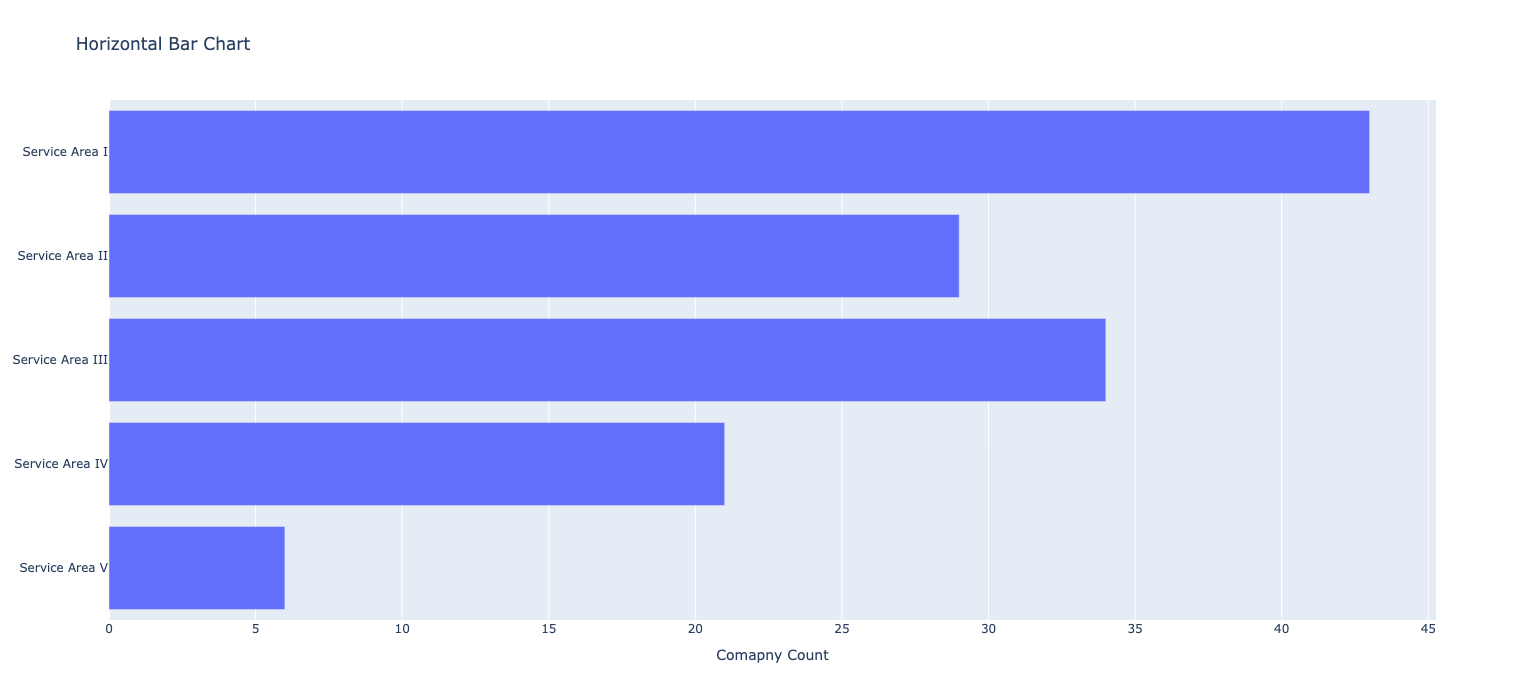

In [8]:
fig = px.bar(df_count,y='service-area',x='company-count', title = 'Horizontal Bar Chart', width=1000, height=700)
fig.update_xaxes(title='Comapny Count') # Change X axis title
fig.update_yaxes(title = None,autorange="reversed") # Reverse y axis order, Hide y axes title
fig.show()

In [10]:
print(fig.data)

(Bar({
    'alignmentgroup': 'True',
    'hovertemplate': 'service-area=%{x}<br>company-count=%{y}<extra></extra>',
    'legendgroup': '',
    'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
    'name': '',
    'offsetgroup': '',
    'orientation': 'h',
    'showlegend': False,
    'textposition': 'auto',
    'x': array(['Service Area I', 'Service Area II', 'Service Area III',
                'Service Area IV', 'Service Area V'], dtype=object),
    'xaxis': 'x',
    'y': array([43, 29, 34, 21,  6]),
    'yaxis': 'y'
}),)


## Sorted Bar Chart

In [11]:
df_count_sorted =df_count.sort_values(by=['company-count'], ascending=False) # Sort Dataframe before ploting
df_count_sorted.head()

service-area  company-count
0    Service Area I             43
2  Service Area III             34
1   Service Area II             29
3   Service Area IV             21
4    Service Area V              6

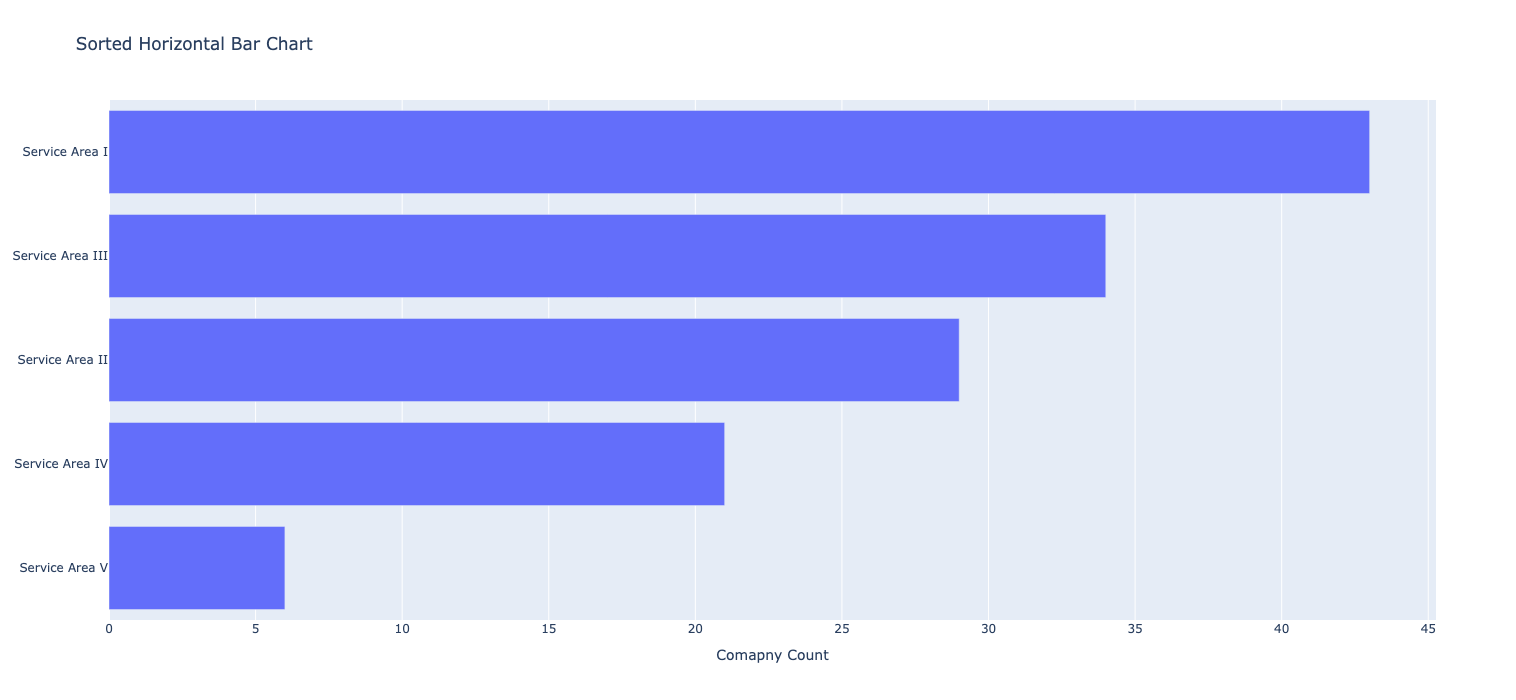

In [12]:
fig = px.bar(df_count_sorted.reset_index(),y='service-area',x='company-count', title = 'Sorted Horizontal Bar Chart', width=1000, height=700)
fig.update_xaxes(title='Comapny Count') # Change X axis title
fig.update_yaxes(title = None,autorange="reversed") # Reverse y axis order
fig.show()

## Overlaying Multiple Charts//Subplots

In [13]:
df_agg = df.groupby('service-area').sum()[['cpu-limit','cpu-used']].reset_index()
df_agg['utilization'] = (df_agg['cpu-used']/df_agg['cpu-limit']*100).astype(int).astype(str) + '%'
df_agg.head()


service-area  cpu-limit  cpu-used utilization
0    Service Area I     1407.0    1052.0         74%
1   Service Area II     1612.0     641.0         39%
2  Service Area III     1553.0    1121.0         72%
3   Service Area IV      515.0     508.0         98%
4    Service Area V      524.0     117.0         22%

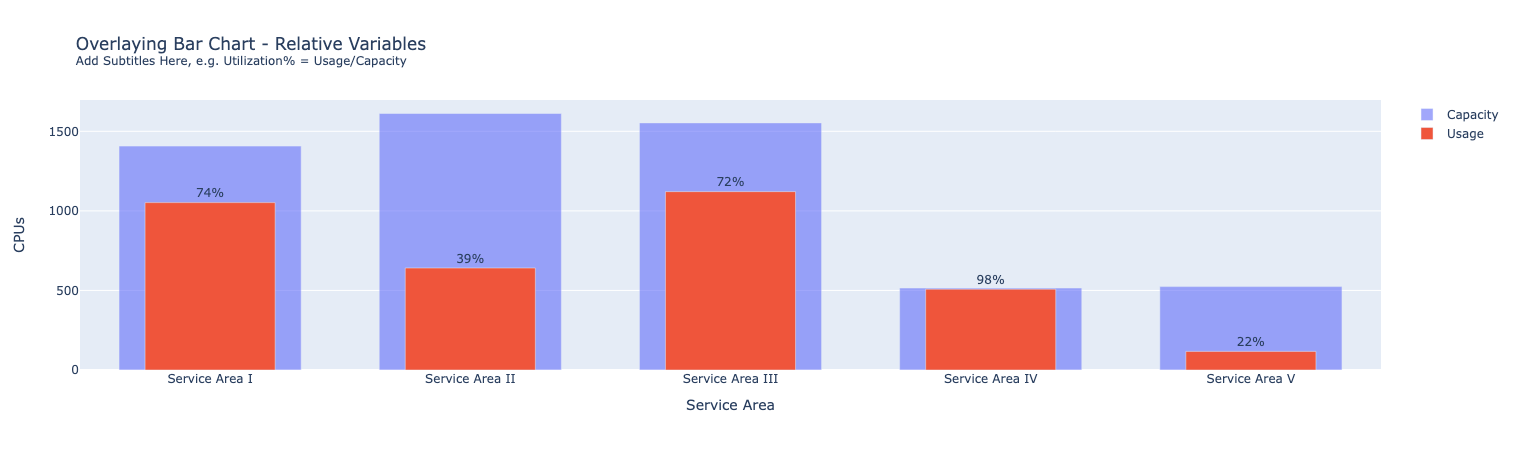

In [14]:
fig = make_subplots(shared_yaxes=True, shared_xaxes=True)
fig.add_bar(x=df_agg['service-area'],y=df_agg['cpu-limit'],opacity=0.6,width=0.7,name='Capacity',hovertemplate='%{y}')
fig.add_bar(x=df_agg['service-area'],y=df_agg['cpu-used'],width=0.5,name='Usage',text=df_agg['utilization'],textposition='outside')
fig.update_layout(barmode='overlay', title= "Overlaying Bar Chart - Relative Variables<br><sup>Add Subtitles Here, e.g. Utilization% = Usage/Capacity</sup>",xaxis_title='Service Area', yaxis_title='CPUs')
fig.show()

## Pie Chart/Donut Chart

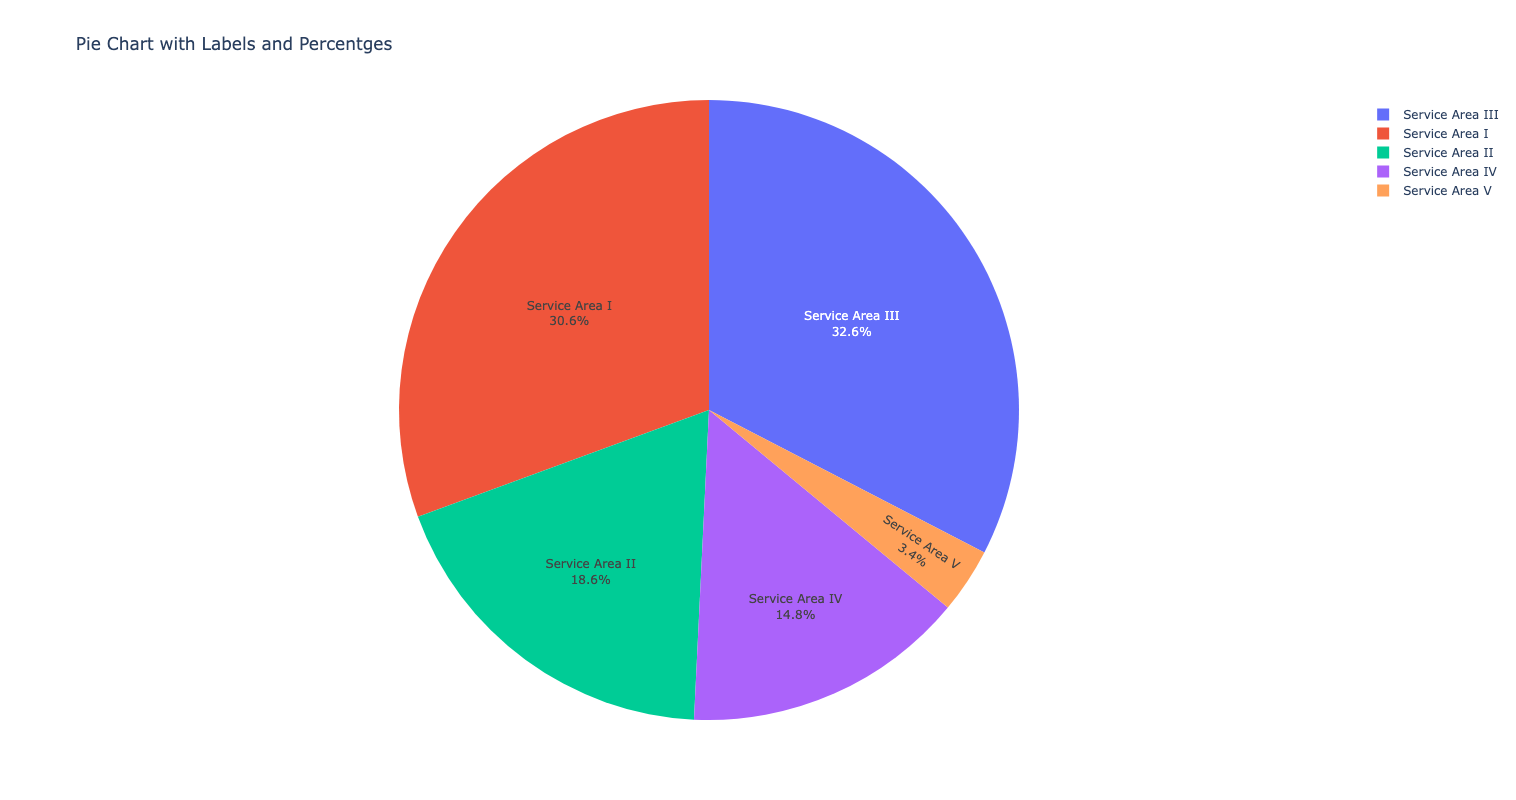

In [15]:
fig = px.pie(df_agg, values=df_agg['cpu-used'], names=df_agg['service-area'], title='Pie Chart with Labels and Percentges',width=800,height=800)
fig.update_traces(textinfo='percent+label') # Add labels for each area
fig.show()

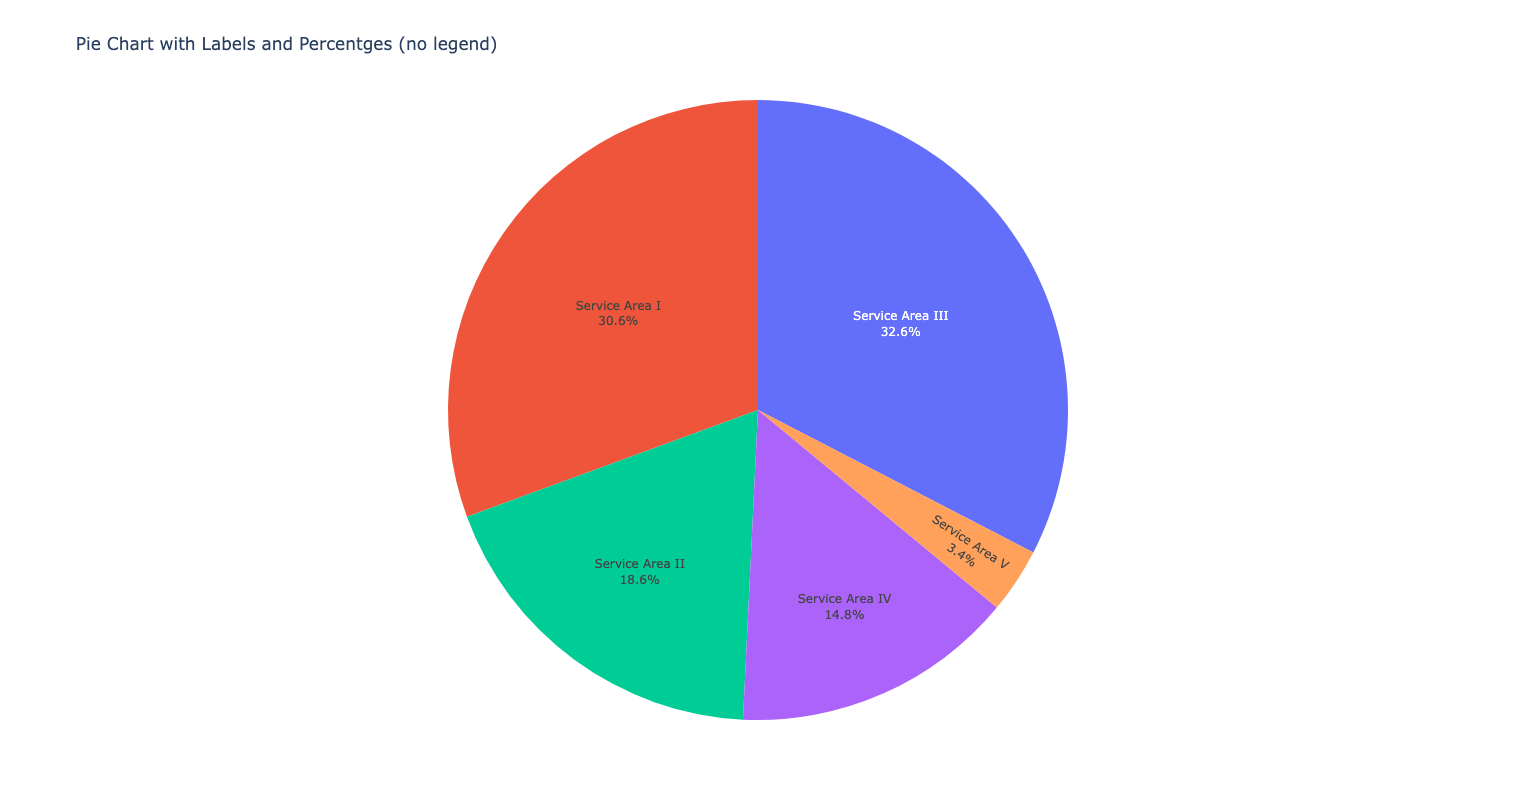

In [16]:
fig = px.pie(df_agg, values=df_agg['cpu-used'], names=df_agg['service-area'], title='Pie Chart with Labels and Percentges (no legend)',width=800,height=800)
fig.update_traces(textinfo='percent+label') # Add labels for each area
fig.update_layout(showlegend=False) # Hide legends
fig.show()

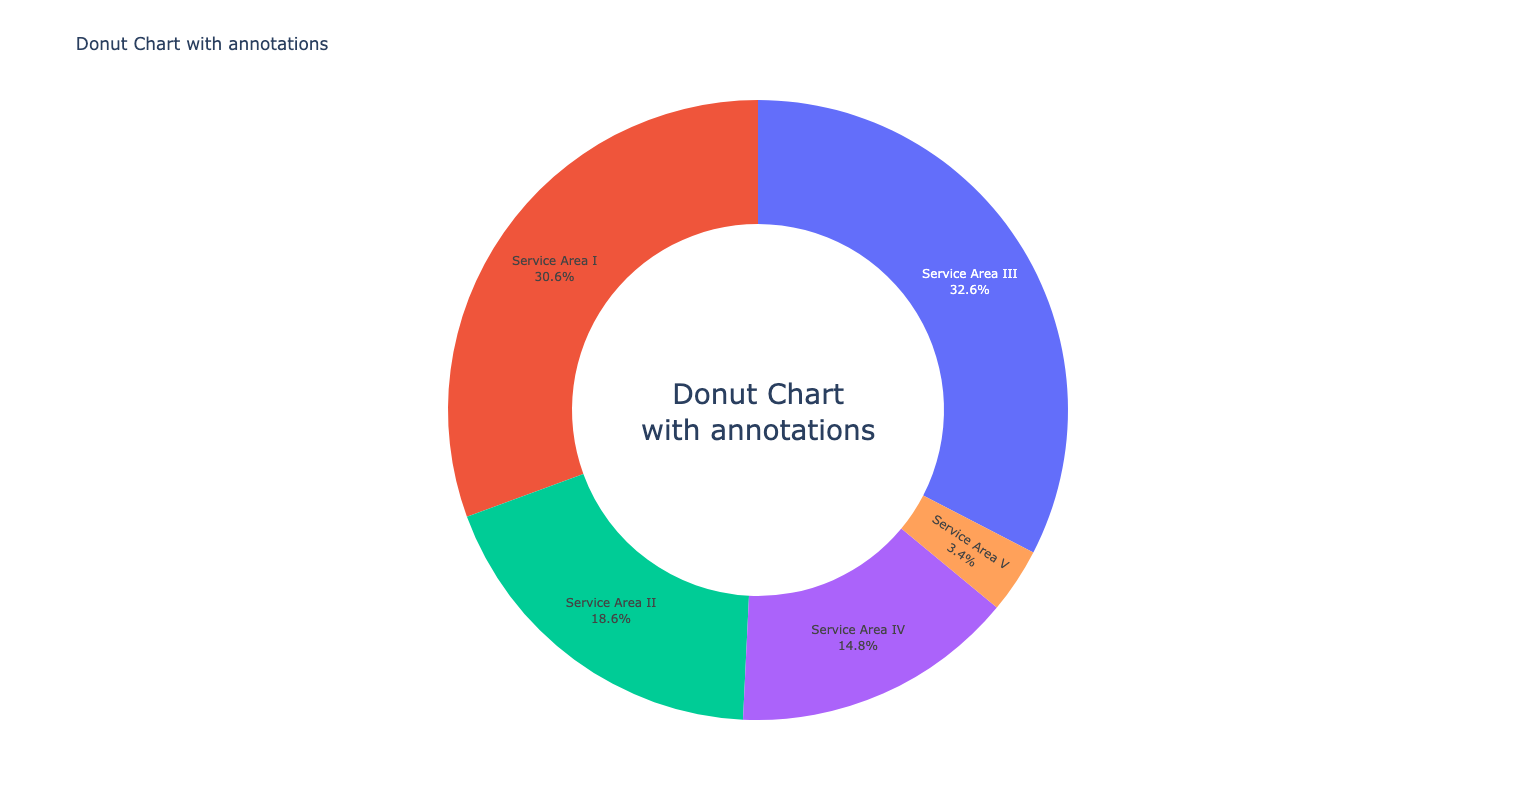

In [17]:
fig = px.pie(df_agg, values=df_agg['cpu-used'], names=df_agg['service-area'],title = 'Donut Chart with annotations', width=800,height=800)
fig.update_traces(textinfo='percent+label',hole=.6) # Add labels for each area
fig.update_layout(annotations=[dict(text='Donut Chart<br>with annotations',x=0.5, y=0.5, font_size=28, showarrow=False)]) # Add annotation
fig.update_layout(showlegend=False) # Hide legends

fig.show()

## Bubble Chart

In [18]:
df_bubble = df.groupby('service-area').agg({'cpu-limit':'sum','cpu-used':'sum','company-id':'count'}).reset_index().rename(columns={'company-id':'company-count'})
df_bubble

service-area  cpu-limit  cpu-used  company-count
0    Service Area I     1407.0    1052.0            152
1   Service Area II     1612.0     641.0             29
2  Service Area III     1553.0    1121.0             68
3   Service Area IV      515.0     508.0             25
4    Service Area V      524.0     117.0              9

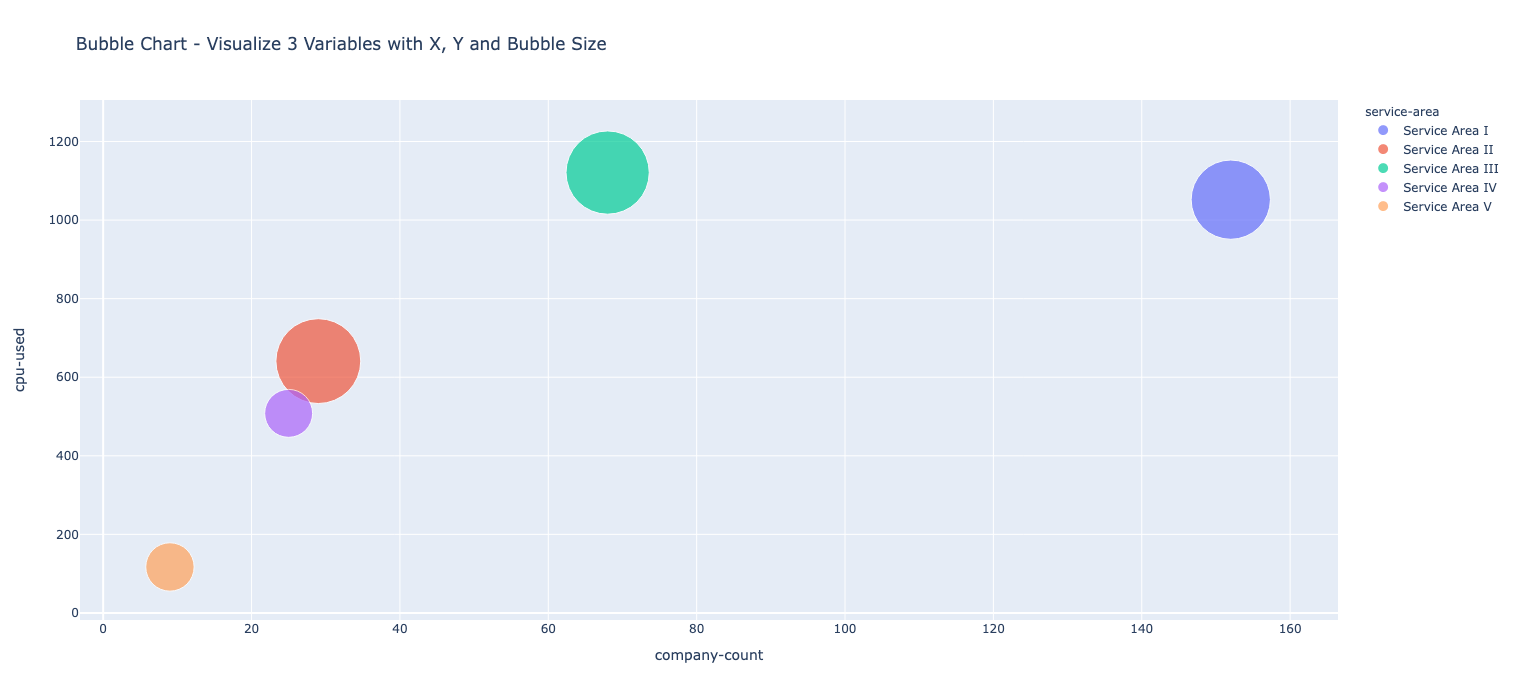

In [19]:
# df_plot = round(df_plot,2).reset_index()
fig = px.scatter(df_bubble, y="cpu-used", x="company-count",
                     size='cpu-limit', size_max=60,
                     color='service-area',title = 'Bubble Chart - Visualize 3 Variables with X, Y and Bubble Size',
                     hover_name='service-area', width=1000,height=700)
fig.show()

## Area Chart: shows changes in volume distribution over time

In [20]:
# aggregate by month
df['date'] =  pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W').astype(str)
df.head()

company-id       date     service-area product-id  cpu-limit  cpu-used  \
18   Company 23 2021-12-17   Service Area I         P2        7.0       2.0   
150  Company 23 2021-12-17  Service Area IV        P24        3.0       2.0   
172  Company 18 2021-12-21   Service Area I         P0        0.0       0.0   
61   Company 18 2021-12-21  Service Area II        P11       91.0      19.0   
206  Company 18 2021-12-21   Service Area I         P5        2.0       2.0   

                      week  
18   2021-12-13/2021-12-19  
150  2021-12-13/2021-12-19  
172  2021-12-20/2021-12-26  
61   2021-12-20/2021-12-26  
206  2021-12-20/2021-12-26

In [21]:
df_area= df.groupby(['service-area','week']).sum()[['cpu-limit','cpu-used']].reset_index()


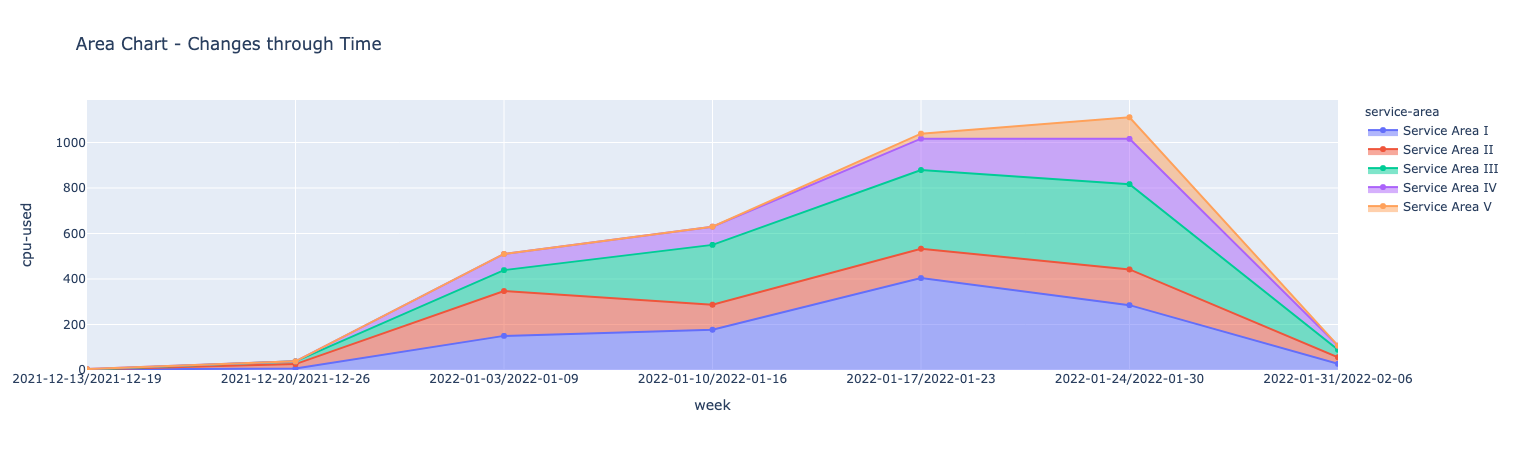

In [22]:
fig = px.area(df_area, x='week', y='cpu-used',color ='service-area', title = 'Area Chart - Changes through Time')
fig.update_traces(mode="markers+lines") # Add markers
fig.update_layout(hovermode='x unified') # Add unified hover
fig.show()